### Stage 1:
Perform statistical parsing/tagging on a document in JSON format

INPUTS: JSON doc for the text input  
OUTPUT: JSON format `ParsedGraf(id, sha1, graf)`

In [1]:
import pytextrank
import sys

path_stage0 = "dat/mih.json"
path_stage1 = "o1.json"

with open(path_stage1, 'w') as f:
    for graf in pytextrank.parse_doc(pytextrank.json_iter(path_stage0)):
        f.write("%s\n" % pytextrank.pretty_print(graf._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(graf))

["777", "7b982e54fa330a6854a0ed5397d49223fdc70645", [[1, "Compatibility", "compatibility", "NN", 1, 0], [0, "of", "of", "IN", 0, 1], [2, "systems", "system", "NNS", 1, 2], [0, "of", "of", "IN", 0, 3], [3, "linear", "linear", "JJ", 1, 4], [4, "constraints", "constraint", "NNS", 1, 5], [0, "over", "over", "IN", 0, 6], [0, "the", "the", "DT", 0, 7], [5, "set", "set", "NN", 1, 8], [0, "of", "of", "IN", 0, 9], [6, "natural", "natural", "JJ", 1, 10], [7, "numbers", "number", "NNS", 1, 11], [0, ".", ".", ".", 0, 12]]]
["777", "dfa572a4a2d2c0fd9254172d95b574b3f6067f63", [[8, "Criteria", "criteria", "NNP", 1, 13], [0, "of", "of", "IN", 0, 14], [1, "compatibility", "compatibility", "NN", 1, 15], [0, "of", "of", "IN", 0, 16], [0, "a", "a", "DT", 0, 17], [2, "system", "system", "NN", 1, 18], [0, "of", "of", "IN", 0, 19], [3, "linear", "linear", "NN", 1, 20], [9, "Diophantine", "diophantine", "NNP", 1, 21], [10, "equations", "equation", "NNS", 1, 22], [0, ",", ",", ".", 0, 23], [11, "strict", "stri

### Stage 2:
Collect and normalize the key phrases from a parsed document

INPUTS: `<stage1>`  
OUTPUT: JSON format `RankedLexeme(text, rank, ids, pos)`

In [2]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

graph, ranks = pytextrank.text_rank(path_stage1)
pytextrank.render_ranks(graph, ranks)

with open(path_stage2, 'w') as f:
    for rl in pytextrank.normalize_key_phrases(path_stage1, ranks):
        f.write("%s\n" % pytextrank.pretty_print(rl._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(rl))

["systems", 0.1258018886608944, [2], "np", 1]
["mixed types", 0.0889132386854998, [33, 24], "np", 1]
["minimal generating sets", 0.07071383636856186, [19, 23, 5], "np", 1]
["types systems", 0.0629009443304472, [24, 2], "np", 1]
["strict inequations", 0.05170005955659954, [11, 12], "np", 1]
["considered", 0.04535170212808048, [15], "vbn", 2]
["types", 0.0444566193427499, [24], "nns", 3]
["natural numbers", 0.035680974352343166, [6, 7], "np", 1]
["set", 0.03535691818428093, [5], "nn", 4]
["minimal set", 0.03535691818428093, [19, 5], "np", 1]
["solutions", 0.03516111710876195, [20], "nns", 3]
["linear diophantine equations", 0.031027760122128316, [3, 9, 10], "np", 1]
["diophantine", 0.027937472512821637, [9], "np", 1]
["linear constraints", 0.027937472512821634, [3, 4], "np", 1]
["solving", 0.027584454272763282, [32], "vbg", 1]
["inequations", 0.02585002977829977, [12], "nns", 2]
["nonstrict inequations", 0.02585002977829977, [13, 12], "np", 1]
["numbers", 0.017840487176171583, [7], "nns"

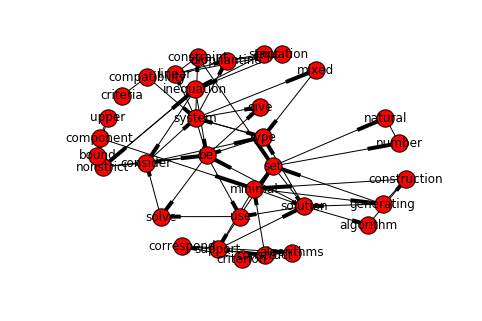

In [3]:
import networkx as nx
import pylab as plt

nx.draw(graph, with_labels=True) 
plt.show() 

### Stage 3:
Calculate a significance weight for each sentence, using MinHash to approximate a Jaccard distance from key phrases determined by TextRank

INPUTS: `<stage1> <stage2>`  
OUTPUT: JSON format `SummarySent(dist, idx, text)`

In [4]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

kernel = pytextrank.rank_kernel(path_stage2)

for s in pytextrank.top_sentences(kernel, path_stage1):
    print(pytextrank.pretty_print(s._asdict()))

{"dist": 0.06545758277341475, "idx": 0, "text": "Compatibility of systems of linear constraints over the set of natural numbers ."}
{"dist": 0.056491207268551454, "idx": 2, "text": "Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given ."}
{"dist": 0.053181973864491486, "idx": 3, "text": "These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types ."}
{"dist": 0.05138524389136729, "idx": 1, "text": "Criteria of compatibility of a system of linear Diophantine equations , strict inequations , and nonstrict inequations are considered ."}


### Stage 4:
Summarize a document based on most significant sentences and key phrases

INPUTS: `<stage2> <stage3>`  
OUTPUT: Markdown format

In [5]:
path_stage2 = "o2.json"
path_stage3 = "o3.json"

phrases = ", ".join(set([p for p in pytextrank.limit_keyphrases(path_stage2, phrase_limit=12)]))
sent_iter = sorted(pytextrank.limit_sentences(path_stage3, word_limit=150), key=lambda x: x[1])
s = []

for sent_text, idx in sent_iter:
    s.append(pytextrank.make_sentence(sent_text))

graf_text = " ".join(s)
print("**excerpts:** %s\n\n**keywords:** %s" % (graf_text, phrases,))

**excerpts:** The surprisingly skillful Google machine, known as AlphaGo, now needs only one more win to claim victory in the match. The Korean-born Lee Sedol will go down in defeat unless he takes each of the match's last three games. Game Three is set for Saturday afternoon inside Seoul's Four Seasons hotel. Lee Sedol is widely-regarded as the top Go player of the last decade, after winning more international titles than all but one other player. Although AlphaGo topped Lee Sedol in the match's first game on Wednesday afternoon, the outcome of Game Two was no easier to predict. But AlphaGo could not.

**keywords:** solutions, mixed types, minimal set, linear constraints, minimal generating sets, types systems, linear diophantine equations, set, systems, diophantine, strict inequations, types, natural numbers
